In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("white")

from matplotlib import font_manager
from matplotlib import rc
import missingno as msno

rc('font', family='Malgun Gothic')

In [2]:
waste_raw_data = pd.read_csv('./datas/waste.csv', encoding='euc-kr')
waste_raw_data.columns

Index(['시도별', '구분별', '항목', '단위', '1996 년', '1997 년', '1998 년', '1999 년',
       '2000 년', '2001 년', '2002 년', '2003 년', '2004 년', '2005 년', '2006 년',
       '2007 년', '2008 년', '2009 년', '2010 년', '2011 년', '2012 년', '2013 년',
       '2014 년', '2015 년', '2016 년', '2017 년', '2018 년', 'Unnamed: 27'],
      dtype='object')

In [3]:
waste_raw_data.drop(['항목', '단위', 'Unnamed: 27'], axis=1, inplace=True)

In [4]:
waste_raw_data['구분'] = waste_raw_data['시도별']+ '_' + waste_raw_data['구분별']

In [5]:
waste_raw_data.drop(['시도별', '구분별'], axis=1, inplace=True)

In [6]:
#  waste_raw_data.columns
columns=list(waste_raw_data.columns[-1:])+list(waste_raw_data.columns[:-1])
waste_raw_data = waste_raw_data[columns]

In [7]:
waste_raw_data = waste_raw_data.T

In [8]:
waste_raw_data.columns=waste_raw_data.iloc[0]
waste_raw_data.drop(waste_raw_data.index[0],inplace=True)

In [9]:
waste_for_graph=waste_raw_data[["매 립_총계","소 각_총계","재활용_총계"]]

In [10]:
waste_for_graph=waste_for_graph.T.groupby("구분").sum().T

In [11]:
waste_for_graph.columns = ['매립', '소각', '재활용']
waste_for_graph["매립"]=waste_for_graph["매립"].apply(lambda x: x/waste_for_graph["매립"][0])
waste_for_graph["소각"]=waste_for_graph["소각"].apply(lambda x: x/waste_for_graph["소각"][0])
waste_for_graph["재활용"]=waste_for_graph["재활용"].apply(lambda x: x/waste_for_graph["재활용"][0])
waste_for_graph

,매립,소각,재활용
1996 년,1.000000,1.000000,1.000000
1997 년,0.884113,1.251009,1.062875
1998 년,0.716026,1.447009,1.189643
1999 년,0.675425,1.715780,1.329334
2000 년,0.632475,1.996367,1.464806
2001 년,0.605397,2.413321,1.598987
2002 년,0.595643,2.652954,1.677415
2003 년,0.579313,2.696624,1.753084
2004 년,0.508131,2.651119,1.879148
2005 년,0.366436,2.845248,2.082097


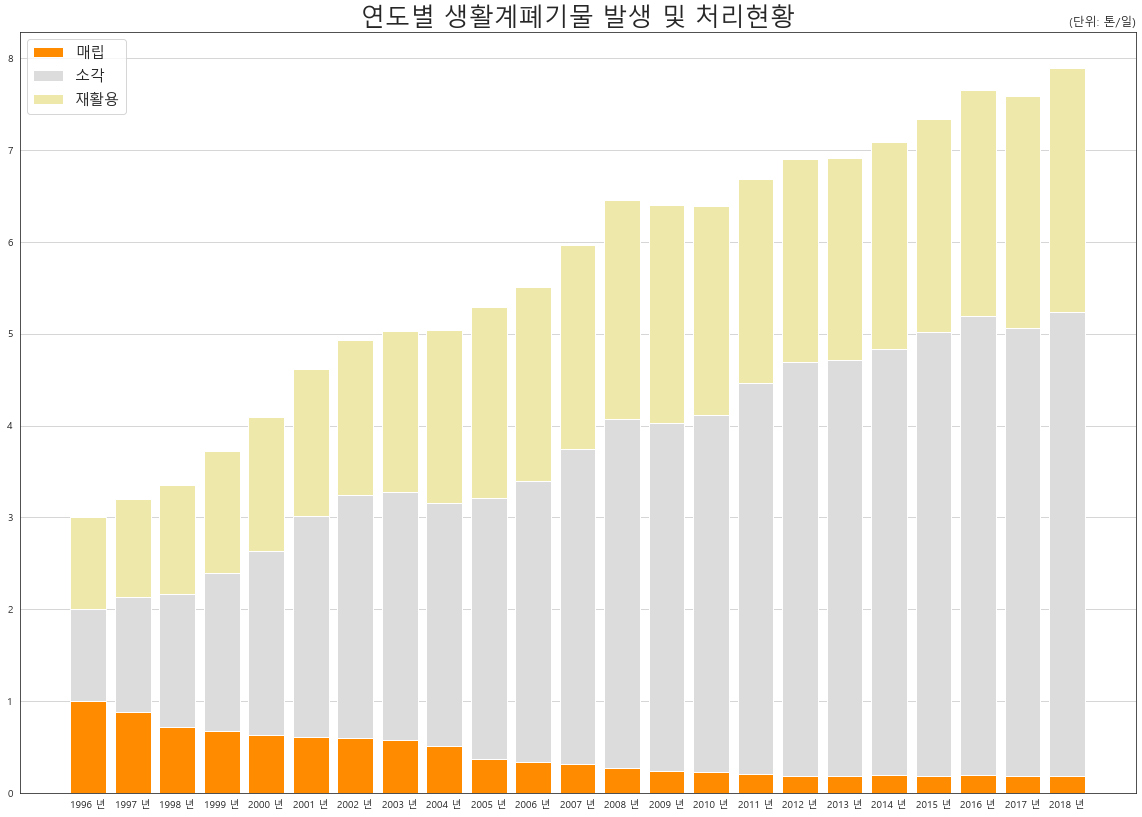

In [12]:
fig = plt.subplots(figsize=(20, 14))
ax = plt.axes()        

ax.bar(waste_for_graph.index, waste_for_graph['매립'], color='darkorange')
ax.bar(waste_for_graph.index, waste_for_graph['소각'], bottom=waste_for_graph['매립'], color='gainsboro')
ax.bar(waste_for_graph.index, waste_for_graph['재활용'], bottom=waste_for_graph['매립']+waste_for_graph['소각'], color='palegoldenrod')

ax.set_title('연도별 생활계폐기물 발생 및 처리현황', fontsize=25)
ax.set_title('(단위: 톤/일)', loc='right')
ax.legend(waste_for_graph.columns, loc='best', fontsize=15)
# ax.grid(b=True)
# ax.patch.set_facecolor('white')       
ax.yaxis.grid()

plt.savefig('./image/waste_barplot.png', dpi=150)
plt.show()

In [14]:
new = pd.read_csv('./datas/waste.csv', encoding='euc-kr')
new["구분별"].unique()


array(['총계', '소계', '음식물 채소류', '종이류', '나무류', '고무피혁류', '플라스틱류', '기타', '연탄재',
       '유리류', '금속류', '토사류', '기타(배출불명 등)', '유리병류', '캔류', '금속캔', '합성수지류',
       '발포수지류', '전자제품', '전지류', '타이어', '윤활유', '형광등', '고철류', '의류', '영농폐기물',
       '가구류', '폐식용유', '재활용잔재물', '음식물류폐기물분리배출'], dtype=object)

In [15]:
drop_list=new[new["구분별"].isin(["총계","소계"])].index
new.drop(drop_list, inplace=True)
new.drop(['항목', '단위', 'Unnamed: 27'], axis=1, inplace=True)
new

,시도별,구분별,1996 년,1997 년,1998 년,1999 년,2000 년,2001 년,2002 년,2003 년,...,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년
3,발생량,음식물 채소류,14531.8,13062.7,11797.9,11577.1,11434.1,11236.6,11397.4,11398.4,...,417.2,242.7,273.1,171.7,162.0,475.90,1120.0,1291.0,1503.5,1743.9
4,발생량,종이류,6379.7,6057.0,5620.0,5785.6,5576.9,5745.8,5640.5,5623.6,...,4915.3,4783.0,4939.8,5247.1,5382.7,5410.44,5444.5,5631.5,5193.9,5184.9
5,발생량,나무류,1856.7,1905.3,1847.6,1862.3,1965.1,2399.9,2400.0,2454.2,...,2340.6,2204.9,2314.1,1982.2,2776.3,1706.14,1627.1,1653.9,1582.0,1694.6
6,발생량,고무피혁류,1121.9,1103.8,1140.4,1106.9,1159.8,1192.5,1281.7,1296.9,...,1115.3,905.3,940.3,1032.1,953.6,953.12,947.4,1091.0,997.4,1102.3
7,발생량,플라스틱류,2166.4,2245.3,2074.6,2331.3,2359.4,2481.3,2692.3,2605.7,...,2816.7,2640.6,2644.4,3010.0,3126.5,3370.00,3738.7,4312.4,4600.9,4884.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,기타,고철류,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3166,기타,의류,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3167,기타,영농폐기물,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3168,기타,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
new["시도별"].unique()

array(['발생량', '매 립', '소 각', '재활용', '기타', '소각', '매립'], dtype=object)

In [26]:
new_maelib=new[new["시도별"]=="매립"]
new_mae_lib=new[new["시도별"]=="매 립"]

In [24]:
new_mae_lib.plot(figsize=(16,10))
plt.show()

TypeError: no numeric data to plot

In [27]:
new_mae_lib = new_mae_lib.dropna()
#msno.matrix(new_mae_lib)

In [28]:
new_maelib["구분별"].unique()
# msno.matrix(new_maelib)

array(['음식물 채소류', '종이류', '나무류', '고무피혁류', '플라스틱류', '기타', '연탄재', '유리류',
       '금속류', '토사류', '기타(배출불명 등)', '유리병류', '캔류', '금속캔', '합성수지류', '발포수지류',
       '전자제품', '전지류', '타이어', '윤활유', '형광등', '고철류', '의류', '영농폐기물', '가구류',
       '폐식용유', '재활용잔재물', '음식물류폐기물분리배출'], dtype=object)

<AxesSubplot:>

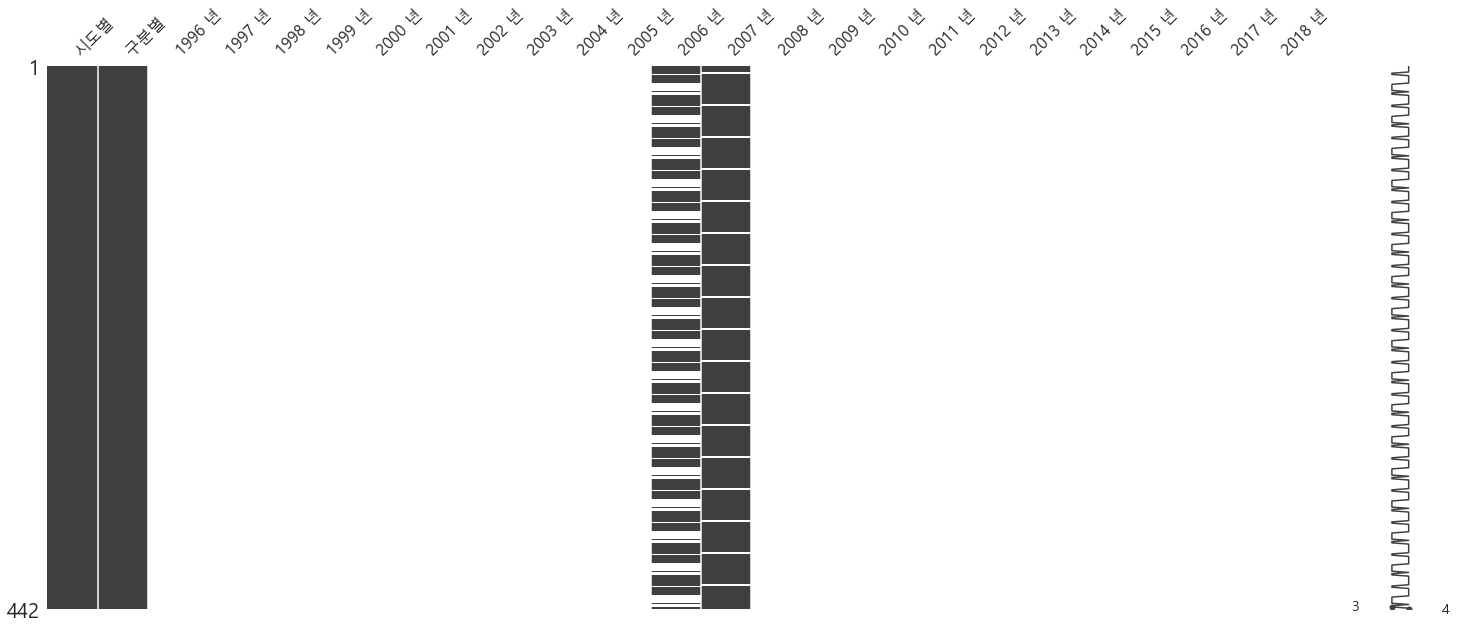

In [29]:
new_gita=new[new["시도별"]=="기타"]
msno.matrix(new_gita)

In [33]:
new_mae_lib = new_mae_lib.T
new_mae_lib.head()

시도별,매 립,매 립,매 립,매 립,매 립,매 립,매 립,매 립,매 립,매 립,...,매 립,매 립,매 립,매 립,매 립,매 립,매 립,매 립,매 립,매 립
구분별,음식물 채소류,종이류,나무류,고무피혁류,플라스틱류,기타,금속류,토사류,기타,종이류,...,플라스틱류,기타,금속류,토사류,기타,종이류,유리병류,플라스틱류,고철류,기타
1996 년,13486.4,5276.5,1420.7,997.6,1907.6,3816.5,1408.2,1372,2487.7,24.1,...,74,417,34,8,146,0,0,0,0,0
1997 년,10973.5,4946.9,1391.3,947.8,1861.2,3796.6,1304.7,1559.5,2405.8,56.5,...,77.2,459.1,27.3,10.5,15.3,0.1,0.1,0,0,0
1998 년,8308.9,4257.7,1255.5,908.2,1624.1,3330.6,1026.1,1130.1,2146.5,54.9,...,90.8,214.8,44.8,18.5,38,11.2,12.8,3.9,7.3,7.9
1999 년,6802.8,4178.4,1207.5,838.3,1719.7,3761.9,973,995.9,2185.6,55.3,...,87.9,186.5,45.9,71.9,73.4,7.3,6,4.2,1.6,1.9


In [34]:
new_mae_lib.columns = new_mae_lib.iloc[0]
new_mae_lib.drop(new_mae_lib.index[0],inplace=True)
new_mae_lib.head()

구분별,음식물 채소류,종이류,나무류,고무피혁류,플라스틱류,기타,금속류,토사류,기타,종이류,...,플라스틱류,기타,금속류,토사류,기타,종이류,유리병류,플라스틱류,고철류,기타
1996 년,13486.4,5276.5,1420.7,997.6,1907.6,3816.5,1408.2,1372,2487.7,24.1,...,74,417,34,8,146,0,0,0,0,0
1997 년,10973.5,4946.9,1391.3,947.8,1861.2,3796.6,1304.7,1559.5,2405.8,56.5,...,77.2,459.1,27.3,10.5,15.3,0.1,0.1,0,0,0
1998 년,8308.9,4257.7,1255.5,908.2,1624.1,3330.6,1026.1,1130.1,2146.5,54.9,...,90.8,214.8,44.8,18.5,38,11.2,12.8,3.9,7.3,7.9
1999 년,6802.8,4178.4,1207.5,838.3,1719.7,3761.9,973,995.9,2185.6,55.3,...,87.9,186.5,45.9,71.9,73.4,7.3,6,4.2,1.6,1.9
2000 년,5185.4,3707.6,1183,856.6,1671.1,4196.5,914.7,1070.2,2288,27.8,...,156.3,172.8,42.2,26.7,58.9,0,0.2,2.9,0,0.7


In [38]:
new_mae_lib.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 1996 년 to 2018 년
Data columns (total 56 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   음식물 채소류  23 non-null     object
 1   종이류      23 non-null     object
 2   나무류      23 non-null     object
 3   고무피혁류    23 non-null     object
 4   플라스틱류    23 non-null     object
 5   기타       23 non-null     object
 6   금속류      23 non-null     object
 7   토사류      23 non-null     object
 8   기타       23 non-null     object
 9   종이류      23 non-null     object
 10  유리병류     23 non-null     object
 11  플라스틱류    23 non-null     object
 12  고철류      23 non-null     object
 13  기타       23 non-null     object
 14  음식물 채소류  23 non-null     object
 15  종이류      23 non-null     object
 16  나무류      23 non-null     object
 17  고무피혁류    23 non-null     object
 18  플라스틱류    23 non-null     object
 19  기타       23 non-null     object
 20  금속류      23 non-null     object
 21  토사류      23 non-null     object
 22  

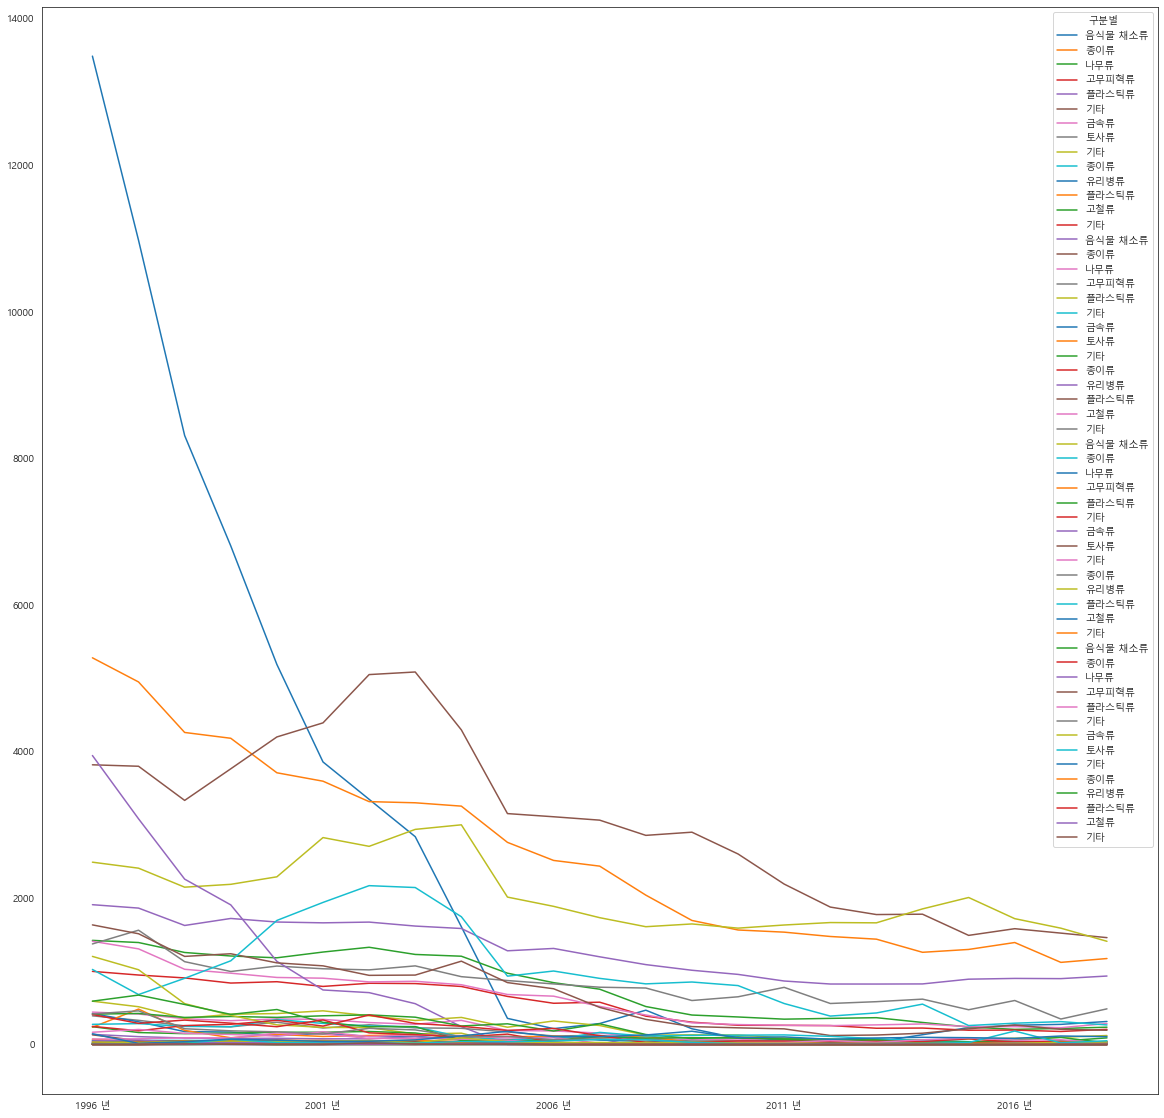

In [49]:
new_mae_lib.plot(figsize=(20,20))
plt.show()